# Binary Limited Dependent Variables
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12,9)})

# 1. Introductory Binary Outcomes Model Analysis
---
- Note: check out https://www.statsmodels.org/stable/discretemod.html to find out more about discrete dependent variable regression in `statsmodels`.

In [2]:
# Import data

data = pd.read_stata('http://dss.princeton.edu/training/Panel101.dta')
data

,country,year,y,y_bin,x1,x2,x3,opinion,op
0,A,1990,1.342788e+09,1.0,0.277904,-1.107956,0.282554,Str agree,1.0
1,A,1991,-1.899661e+09,0.0,0.320685,-0.948720,0.492538,Disag,0.0
2,A,1992,-1.123436e+07,0.0,0.363466,-0.789484,0.702523,Disag,0.0
3,A,1993,2.645775e+09,1.0,0.246144,-0.885533,-0.094391,Disag,0.0
4,A,1994,3.008335e+09,1.0,0.424623,-0.729768,0.946131,Disag,0.0
...,...,...,...,...,...,...,...,...,...
65,G,1995,1.323696e+09,1.0,1.087186,-1.409817,2.829808,Str disag,0.0
66,G,1996,2.545242e+08,1.0,0.781075,-1.328000,4.278224,Str agree,1.0
67,G,1997,3.297033e+09,1.0,1.257879,-1.577367,4.587326,Disag,0.0
68,G,1998,3.011821e+09,1.0,1.242777,-1.601218,6.113762,Disag,0.0


In [3]:
# Restrict dataset to 4 countries and 4 years

restrict_data = data.query('year < 1994')
selected_countries = list(restrict_data['country'].unique()[:4])
restrict_data = restrict_data[restrict_data['country'].isin(selected_countries)]

## 1.1 Exploratory Data Analysis

<AxesSubplot:xlabel='x1', ylabel='y_bin'>

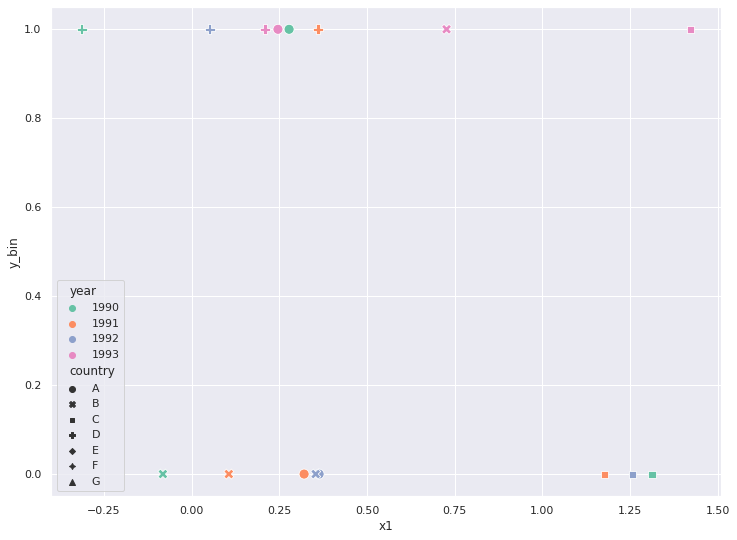

In [4]:
# let's plot y_bin against x_1 for restricted dataset
# Add colour mappings (covariate to points) using the "hue" argument
# Add marker shape mappings using the "style" arguent 

sns.scatterplot(x='x1', y='y_bin', hue='year', style='country', data=restrict_data, s=100, palette='Set2') # s marker size

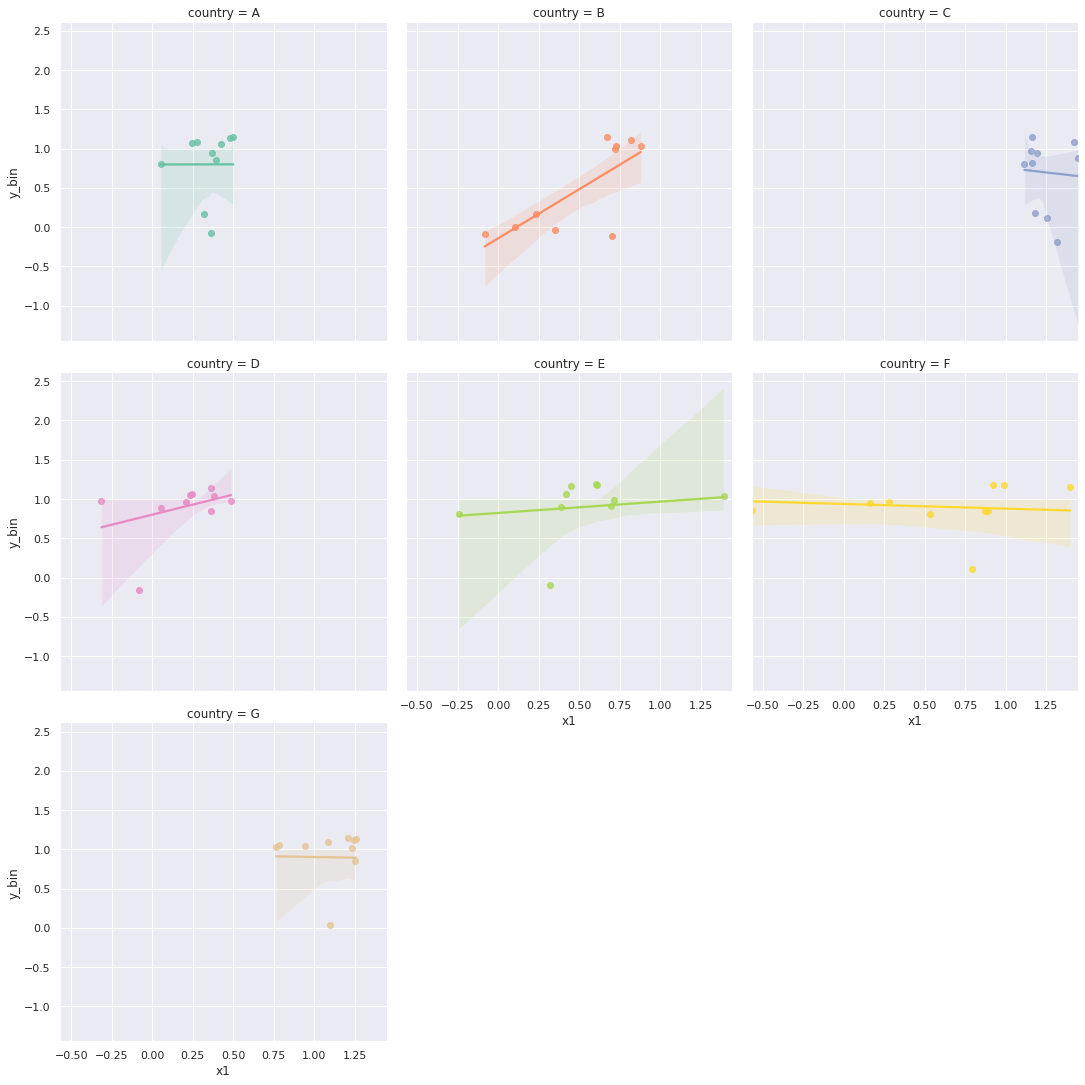

In [5]:
# Explore full dataset with cross-sectional graphical LPM

sns.lmplot(x='x1',
           y='y_bin',
           col='country',
           hue='country',
           y_jitter=0.2, # Jitter
           data=data,
           col_wrap=3, # Number of columns per row
           palette='Set2')

## 1.2 LPM, Logit, Probit, and Cauchit Estimation

### 1.2.1 LPM

In [6]:
# Naive linear probability model

lpm_mod = sm.OLS.from_formula('y_bin ~ x1 + x2 + x3', data=data)
lpm_res = lpm_mod.fit()
lpm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_bin   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.019
Date:                Mon, 18 Jan 2021   Prob (F-statistic):              0.390
Time:                        21:57:23   Log-Likelihood:                -33.601
No. Observations:                  70   AIC:                             75.20
Df Residuals:                      66   BIC:                             84.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6839      0.100      6.841      0.000       0.484       0.883
x1             0.1002      0.120      0.834      0.407      -0.140       0.340
x2             0.0427      0.046      0.933      0.354      -0.049       0.134
x3             0.0597      0.039      1.550      0.126      -0.017       0.137
==============================================================================
Omnibus:                       16.803   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.621
Skew:                          -1.361   Prob(JB):                     2.02e-05
Kurtosis:                       3.037   Cond. No.                         5.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.2.2 Generalised Linear Models (GLM)
- See documentation (including list of link functions and distribution families implement) here: https://www.statsmodels.org/stable/glm.html
- Note: since we are working with binary dependent variables, we use the "binomial" distribution family for the following examples.

In [7]:
# Logit via Generalised Linear Model (GLM)
# Pass in logit link function instance into the binomial distribution family

logit_mod = smf.glm(formula='y_bin ~ x1 + x2 + x3', data=data, family=sm.families.Binomial(sm.families.links.logit()))
logit_res = logit_mod.fit()
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  y_bin   No. Observations:                   70
Model:                            GLM   Df Residuals:                       66
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.756
Date:                Mon, 18 Jan 2021   Deviance:                       65.512
Time:                        21:57:23   Pearson chi2:                     62.4
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4262      0.639      0.667      0.505      -0.826       1.679
x1             0.8618      0.784      1.099      0.272      -0.675       2.398
x2             0.3665      0.308      1.189      0.234      -0.237       0.971
x3             0.7512      0.455      1.652      0.099      -0.140       1.643
==============================================================================
"""

In [8]:
# Probit via Generalised Linear Model (GLM)
# Pass in probit link function instance into the binomial distribution family

probit_mod = smf.glm(formula='y_bin ~ x1 + x2 + x3',
                     data=data,
                     family=sm.families.Binomial(sm.families.links.probit()))
probit_res = probit_mod.fit()
probit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  y_bin   No. Observations:                   70
Model:                            GLM   Df Residuals:                       66
Model Family:                Binomial   Df Model:                            3
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.593
Date:                Mon, 18 Jan 2021   Deviance:                       65.185
Time:                        21:57:23   Pearson chi2:                     62.2
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2508      0.381      0.658      0.511      -0.497       0.998
x1             0.5274      0.454      1.161      0.246      -0.363       1.418
x2             0.2345      0.178      1.315      0.188      -0.115       0.584
x3             0.4616      0.263      1.754      0.079      -0.054       0.977
==============================================================================
"""

In [9]:
# Cauchit via Generalised Linear Model (GLM)
# Pass in cauchy link function instance into the binomial distribution family

cauchy_mod = smf.glm(formula='y_bin ~ x1 + x2 + x3', data=data, family=sm.families.Binomial(sm.families.links.cauchy()))
cauchy_res = cauchy_mod.fit()
cauchy_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  y_bin   No. Observations:                   70
Model:                            GLM   Df Residuals:                       66
Model Family:                Binomial   Df Model:                            3
Link Function:                 cauchy   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33.524
Date:                Mon, 18 Jan 2021   Deviance:                       67.047
Time:                        21:57:23   Pearson chi2:                     64.5
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4585      0.700      0.655      0.513      -0.914       1.831
x1             0.9365      1.028      0.911      0.362      -1.078       2.951
x2             0.2236      0.380      0.589      0.556      -0.521       0.968
x3             0.6645      0.606      1.097      0.273      -0.523       1.852
==============================================================================
"""

### 1.2.3 Graph Predicted Probabilties
---
- Let's first graph the in-sample (i.e. values of X observed in the data) predicted probabilities.

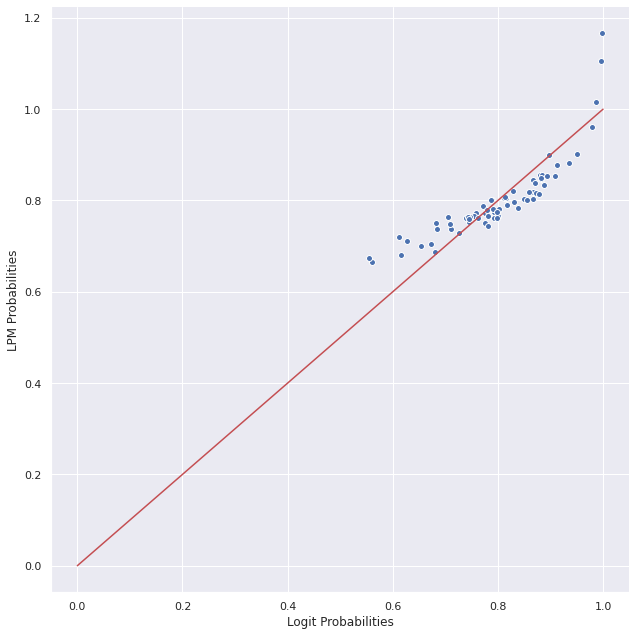

In [10]:
# Graph LPM predictions against Logit predictions

X = data[['x1', 'x2', 'x3']]
graph_data = pd.DataFrame({'LPM Probabilities': lpm_res.predict(X), 'Logit Probabilities': logit_res.predict(X)})
g = sns.FacetGrid(graph_data, height=9)
g = g.map(plt.scatter, 'Logit Probabilities', 'LPM Probabilities', edgecolor="w")
plt.plot([0,1], [0,1], color='r')
plt.show()

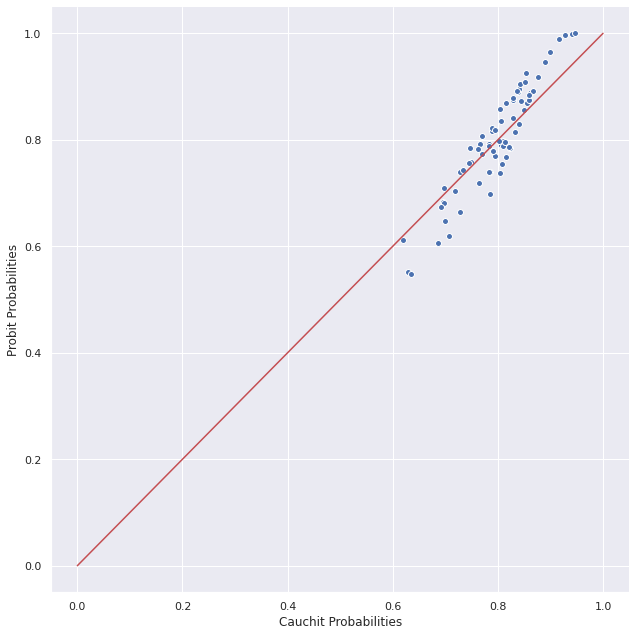

In [11]:
# Graph Probit predictions against Cauchit predictions

X = data[['x1', 'x2', 'x3']]
graph_data = pd.DataFrame({'Cauchit Probabilities': cauchy_res.predict(X), 'Probit Probabilities': probit_res.predict(X)})
g = sns.FacetGrid(graph_data, height=9)
g = g.map(plt.scatter, 'Cauchit Probabilities', 'Probit Probabilities', edgecolor="w")
plt.plot([0,1], [0,1], color='r')
plt.show()

# 2. Tobit
- Labour market data (http://www.principlesofeconometrics.com/poe5/data/csv/mroz.csv).
- Note: `statsmodels` currently has no implementation of Tobit, but fear not, let's define the log-likelihood, then solve for the global maximum using numerical methods.

In [12]:
# Import data

mroz_data = pd.read_csv('http://www.principlesofeconometrics.com/poe5/data/csv/mroz.csv')
mroz_data = mroz_data[['hours', 'educ', 'exper', 'age', 'kidsl6']] # Select relevant columns
mroz_data

,hours,educ,exper,age,kidsl6
0,1610,12,14,32,1
1,1656,12,5,30,0
2,1980,12,15,35,1
3,456,12,6,34,0
4,1568,14,7,31,1
...,...,...,...,...,...
748,0,13,5,40,0
749,0,12,14,31,2
750,0,12,4,43,0
751,0,12,15,60,0


<AxesSubplot:xlabel='hours', ylabel='Count'>

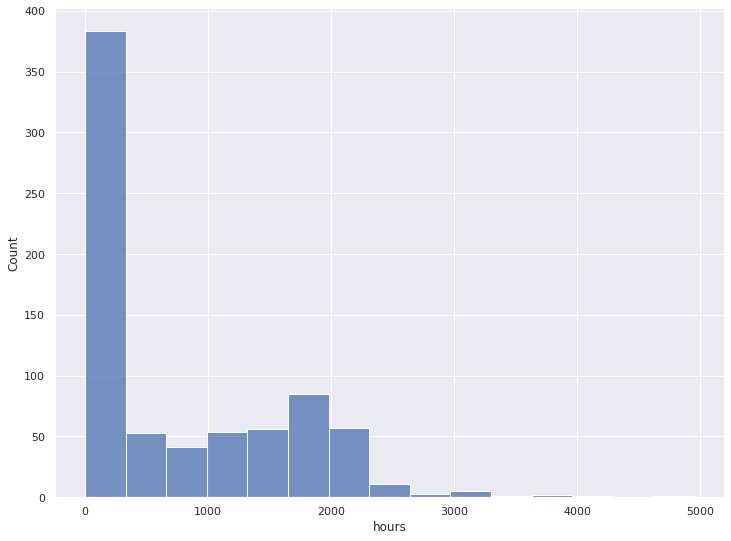

In [14]:
# Histogram of hours worked

sns.histplot(mroz_data['hours'])

In [15]:
# Naive LPM

lpm_mroz_mod = sm.OLS.from_formula('hours ~ educ + exper + age + kidsl6', data=mroz_data)
lpm_mroz_res = lpm_mroz_mod.fit()
lpm_mroz_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     64.71
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           5.24e-47
Time:                        21:58:15   Log-Likelihood:                -6053.9
No. Observations:                 753   AIC:                         1.212e+04
Df Residuals:                     748   BIC:                         1.214e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1335.3060    235.649      5.667      0.000     872.695    1797.918
educ          27.0857     12.240      2.213      0.027       3.057      51.114
exper         48.0398      3.642     13.191      0.000      40.890      55.189
age          -31.3078      3.961     -7.904      0.000     -39.084     -23.532
kidsl6      -447.8547     58.413     -7.667      0.000    -562.527    -333.183
==============================================================================
Omnibus:                       81.428   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.172
Skew:                           0.782   Prob(JB):                     3.60e-26
Kurtosis:                       4.134   Cond. No.                         399.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Tobit from scratch (WORK IN PROGRESS)